<a href="https://colab.research.google.com/github/ardilapablo/VisualizacionDeDatos/blob/main/EjerciciosClase/CLASE2_VISUALIZACION_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import plotly.express as px

# Ruta completa al archivo CSV
ruta_csv = '/content/drive/My Drive/datos_ejercicio_ventas.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_csv)
df.head()


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


Vamos a limpiar nuestros datos eliminando duplicados y filtrando los valores negativos en la columna AMOUNT para que solo cuente con los positivos o 0, ya que un valor negativo en este campo no tendría sentido en un contexto de ventas o predicciones. Decidimos conservar los valores nulos en las columnas FORECAST y FORECAST_YEAR porque corresponden a datos reales (SCENARIO = "Actual") que no necesitan predicción o año de predicción.

In [15]:
# Eliminamos duplicados
df_limpio = df.drop_duplicates()

# Filtramos filas con valores negativos en 'AMOUNT'
df_limpio = df_limpio[df_limpio['AMOUNT'] >= 0]
df_limpio.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


In [16]:
# Contamos cuántos datos hay de cada tipo en la columna 'SCENARIO'
conteo_scenario = df['SCENARIO'].value_counts().reset_index()

# Renombramos las columnas para que sean más descriptivas
conteo_scenario.columns = ['SCENARIO', 'COUNT']

fig = px.bar(conteo_scenario, x='SCENARIO', y='COUNT', title='Cantidad de Actuals vs Forecasts',
             labels={'SCENARIO': 'Tipo de Dato', 'COUNT': 'Cantidad'})

fig.show()

Podemos observar la cantidad de predicciones (AI_forecast) en comparación con los valores reales (actual) en el conjunto de datos. Podemos ver que hay muchas más predicciones que valores actuales.

In [17]:
# Contamos cuántos datos hay de cada sub-marca en la columna SUBBRAND
conteo_subbrand = df['SUBBRAND'].value_counts().reset_index()

# Renombramos las columnas para que sean más descriptivas
conteo_subbrand.columns = ['SUBBRAND', 'COUNT']

fig = px.bar(conteo_subbrand, x='SUBBRAND', y='COUNT', title='Cantidad de Datos por Submarca',
             labels={'SUBBRAND': 'Submarca', 'COUNT': 'Cantidad'})

fig.show()


Podemos ver que Pepsi Max es una de las sub-marcas con mayor volumen de datos mientras que Mountain Dew es la que menos cantidad de datos tiene en la base de datos.

In [18]:
# Agrupamos por submarca y sumamos el AMOUNT
df_amount_subbrand = df.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

fig = px.bar(
    df_amount_subbrand,
    x='SUBBRAND',
    y='AMOUNT',
    title="Importe Total de Ventas (AMOUNT) por Submarca",
    labels={'AMOUNT': 'Monto Total de Ventas', 'SUBBRAND': 'Submarca'},
    color='SUBBRAND'
)

fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_title="Submarca",
    yaxis_title="Monto Total (AMOUNT)",
    showlegend=False
)

fig.show()



In [20]:
# Asegúrate de tener una columna de fecha completa para cada registro
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupar por mes para contar la cantidad de registros
df_monthly_counts = df.groupby('DATE').size().reset_index(name='COUNT')

# Crear el gráfico de barras
fig = px.bar(
    df_monthly_counts,
    x='DATE',
    y='COUNT',
    title="Cantidad de Datos por Mes",
    labels={'COUNT': 'Cantidad de Datos', 'DATE': 'Fecha'}
)

fig.show()


##Distribuir las Ventas por País


In [21]:

fig_sales_by_country = px.histogram(
    df,
    x='COUNTRY',
    y='AMOUNT',
    color='SUBBRAND',
    title="Distribución de Ventas Totales por País y Marca",
    labels={'AMOUNT': 'Ventas Totales', 'COUNTRY': 'País'},
    barmode='stack'
)

fig_sales_by_country.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig_sales_by_country.show()


##Evolución Mensual de las Ventas por Año




In [22]:


# Asegurarse de que la columna 'DATE' sea de tipo datetime
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupamos por año y mes, calculando el total de AMOUNT para cada mes en cada año
df_monthly_amount = df.groupby(['YEAR', 'MONTH']).agg({'AMOUNT': 'sum'}).reset_index()

fig = px.line(
    df_monthly_amount,
    x='MONTH',
    y='AMOUNT',
    color='YEAR',
    title="Evolución Mensual del Importe (AMOUNT) por Año",
    labels={'AMOUNT': 'Monto Total (AMOUNT)', 'MONTH': 'Mes', 'YEAR': 'Año'},
)

# Ajustamos el eje x para mostrar los meses de manera correcta
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    )
)

fig.show()


##Distribución de Ventas por Marca

In [23]:


fig_sales_by_brand = px.bar(
    df,
    x='SUBBRAND',
    y='AMOUNT',
    title="Distribución de Ventas Totales por Submarca",
    labels={'AMOUNT': 'Monto Total de Ventas (AMOUNT)', 'SUBBRAND': 'Submarca'},
    color='SUBBRAND',  # Color por cada sub-marca

)

# Cambiar el fondo a blanco
fig_sales_by_brand.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_title="Submarca",
    yaxis_title="Monto Total (AMOUNT)",
    legend_title_text='Submarca'
)

fig_sales_by_brand.show()


##Tendencia y Estacionalidad del País con Menos Ventas

<ipython-input-40-bc2b1c117663>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-bc2b1c117663>:18: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



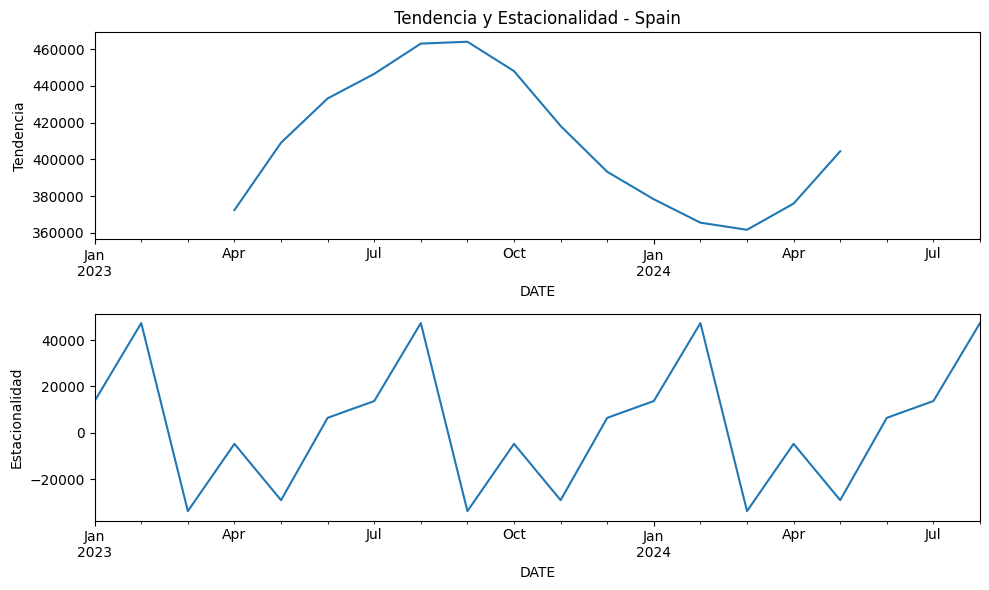

In [40]:
import matplotlib.pyplot as plt
# Filtrar solo los datos reales ('actual')
df_actual = df[df['SCENARIO'] == 'actual']

# País con menos ventas
# Agrupar por país y sumar las ventas para encontrar el país con menos ventas
ventas_por_pais = df_actual.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
pais_menos_ventas = ventas_por_pais.loc[ventas_por_pais['AMOUNT'].idxmin()]['COUNTRY']

# Filtrar los datos del país con menos ventas
df_pais_menos_ventas = df_actual[df_actual['COUNTRY'] == pais_menos_ventas]

# Crear una columna de fecha para análisis temporal
df_pais_menos_ventas['DATE'] = pd.to_datetime(df_pais_menos_ventas[['YEAR', 'MONTH']].assign(DAY=1))
df_pais_menos_ventas = df_pais_menos_ventas.set_index('DATE')

# Agrupar por mes y año para obtener la serie temporal
df_pais_menos_ventas_mensual = df_pais_menos_ventas.resample('M')['AMOUNT'].sum()

# Descomponer la serie temporal para el país con menos ventas (ajusta el periodo si es necesario)
decompose_pais = seasonal_decompose(df_pais_menos_ventas_mensual, model='additive', period=6)

# Graficar solo la tendencia y la estacionalidad
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
decompose_pais.trend.plot(ax=ax1)
ax1.set_ylabel('Tendencia')
ax1.set_title(f'Tendencia y Estacionalidad - {pais_menos_ventas}')

decompose_pais.seasonal.plot(ax=ax2)
ax2.set_ylabel('Estacionalidad')

plt.tight_layout()
plt.show()

## Tendencia y Estacionalidad de la Marca con Más Ventas

<ipython-input-42-b9aed0ffb374>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-b9aed0ffb374>:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



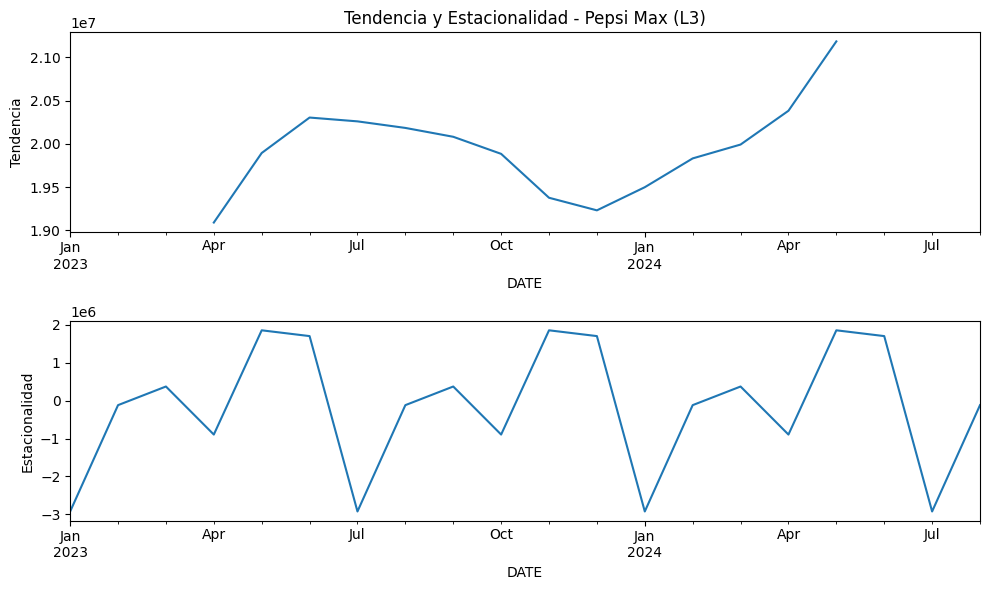

In [42]:
#Marca con más ventas
# Agrupar por submarca y sumar las ventas para encontrar la marca con más ventas
ventas_por_marca = df_actual.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
marca_mas_ventas = ventas_por_marca.loc[ventas_por_marca['AMOUNT'].idxmax()]['SUBBRAND']

# Filtrar los datos de la marca con más ventas
df_marca_mas_ventas = df_actual[df_actual['SUBBRAND'] == marca_mas_ventas]

# Crear una columna de fecha para análisis temporal
df_marca_mas_ventas['DATE'] = pd.to_datetime(df_marca_mas_ventas[['YEAR', 'MONTH']].assign(DAY=1))
df_marca_mas_ventas = df_marca_mas_ventas.set_index('DATE')

# Agrupar por mes y año para obtener la serie temporal
df_marca_mas_ventas_mensual = df_marca_mas_ventas.resample('M')['AMOUNT'].sum()

# Descomponer la serie temporal para la marca con más ventas (ajusta el periodo si es necesario)
decompose_marca = seasonal_decompose(df_marca_mas_ventas_mensual, model='additive', period=6)

# Graficar solo la tendencia y la estacionalidad
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
decompose_marca.trend.plot(ax=ax1)
ax1.set_ylabel('Tendencia')
ax1.set_title(f'Tendencia y Estacionalidad - {marca_mas_ventas}')

decompose_marca.seasonal.plot(ax=ax2)
ax2.set_ylabel('Estacionalidad')

plt.tight_layout()
plt.show()

##¿Cuales son las predicciones hechas en España y como de buenas son?

In [45]:
# Filtrar los datos para España
df_espana = df[df['COUNTRY'] == 'Spain']

# Calcular las ventas promedio por marca en España y seleccionar las tres marcas con mayores ventas promedio
ventas_promedio_marcas = df_espana[df_espana['SCENARIO'] == 'actual'].groupby('SUBBRAND')['AMOUNT'].mean()
top_3_marcas = ventas_promedio_marcas.nlargest(3).index

# Filtrar los datos para solo incluir las tres marcas principales
df_espana_top3 = df_espana[df_espana['SUBBRAND'].isin(top_3_marcas)]

# Separar los datos reales y predicciones
df_real = df_espana_top3[df_espana_top3['SCENARIO'] == 'actual']
df_forecast = df_espana_top3[df_espana_top3['SCENARIO'] == 'AI_forecast']

# Crear una columna de fecha para ambos DataFrames
df_real['DATE'] = pd.to_datetime(df_real[['YEAR', 'MONTH']].assign(DAY=1))
df_forecast['DATE'] = pd.to_datetime(df_forecast[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupar por fecha para calcular el promedio de ventas de las tres mejores marcas
df_real_avg = df_real.groupby('DATE')['AMOUNT'].mean().reset_index(name='AMOUNT_real')
df_forecast_avg = df_forecast.groupby('DATE')['AMOUNT'].mean().reset_index(name='AMOUNT_forecast')

# Unir los datos reales y predichos en un solo DataFrame para comparar
df_comparacion = pd.merge(df_real_avg, df_forecast_avg, on='DATE')

# Graficar el seguimiento de predicción vs. real para el promedio de las tres mejores marcas
fig = px.line(df_comparacion, x='DATE', y=['AMOUNT_real', 'AMOUNT_forecast'],
              labels={'value': 'Ventas Promedio (AMOUNT)', 'variable': 'Tipo de Valor'},
              title='Seguimiento de Predicción vs Real para el Promedio de las 3 Mejores Marcas en España')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Ventas Promedio (AMOUNT)')
fig.show()

<ipython-input-45-a6c3404b0c68>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-a6c3404b0c68>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
# Transformar los datos para formato largo para el gráfico de barras apiladas
df_comparacion_long = df_comparacion.melt(id_vars='DATE', value_vars=['AMOUNT_real', 'AMOUNT_forecast'],
                                          var_name='Tipo de Valor', value_name='Ventas Promedio (AMOUNT)')

# Crear el gráfico de barras apiladas
fig = px.bar(df_comparacion_long, x='DATE', y='Ventas Promedio (AMOUNT)', color='Tipo de Valor',
             title='Seguimiento de Predicción vs Real para el Promedio de las 3 Mejores Marcas en España (Barras Apiladas)',
             labels={'Ventas Promedio (AMOUNT)': 'Ventas Promedio (AMOUNT)', 'DATE': 'Fecha', 'Tipo de Valor': 'Valor'})
fig.update_layout(barmode='group', xaxis_title='Fecha', yaxis_title='Ventas Promedio (AMOUNT)')
fig.show()
